# Learning Lab #1

#### In this lab, you will write several image processing routines, each described below.

These initial code blocks will import some of the routines that you'll need.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np # this is so that you can see which functions come from the numpy library
import matplotlib.pyplot as plt # this is so that you can see which functions come from the pyplot library
plt.rcParams['figure.figsize'] = [15,8]
plt.rcParams['axes.titlesize'] = '16'
plt.rcParams['axes.titleweight'] = 'bold'

import cv2
def just_title(title):
    a = plt.gca()
    a.set_title(title, fontdict={'fontsize': rcParams['axes.titlesize'],
                                 'fontweight' : rcParams['axes.titleweight'],
                                 'verticalalignment': 'baseline',
                                 'horizontalalignment': 'center'})
    a.set_xticks([])
    a.set_yticks([])

from scipy import misc
print()


big_face = misc.face()
s = 128.0/big_face.shape[0]
sm_face = cv2.resize(big_face,(0,0),fx=s,fy=s)

imshow(sm_face);
just_title('Original Color Image')

NameError: name 'imshow' is not defined

<br>
<br>

### Problem 1 - Gray Scale

Convert a color image to  gray scale: write a function that takes in  a  color  image  and  returns a  grayscale  image  using  the  following  formula  for  conversion:  

$Gray=  0.299 \cdot Red  +  0.587 \cdot Green  +  0.114 \cdot Blue$

In [11]:
def color2gray(image):
    print(image.shape)
    result = .29*image[:, :, 0] + 0.587*image[:, :, 1] + .114*image[:, :, 2]
    return result

<br>

Now test your code... 


(128, 171, 3)


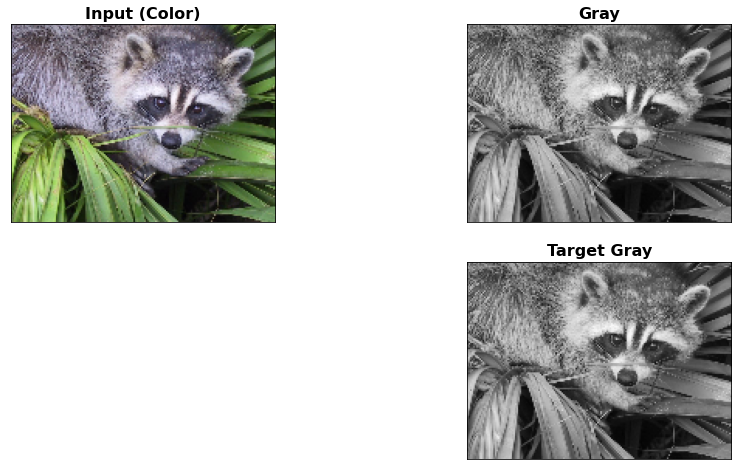

In [12]:
print()
gray_face = color2gray(sm_face)

plt.subplot(221)
plt.imshow(sm_face)
just_title('Input (Color)')

plt.subplot(222)
plt.imshow(gray_face,cmap="gray",vmin=0,vmax=255)
just_title('Gray')

target = cv2.imread('targets/gray.png')
plt.subplot(224)
plt.imshow(target,cmap="gray",vmin=0,vmax=255)
just_title('Target Gray')

plt.show()

<br>
<br>

### Problem 2 - Brightness Adjustment

For this problem, you should read in a  grayscale  image (e.g. from above) and  returns  the  corresponding  result  with  the  brightness  increased or decreased by  a  specified  amount (passed  as  a  parameter).

Be careful if you go below 0 or above 255.  What happens?

In [13]:
def adjust_brightness(image, offset):
    result = image + offset
    return result

<br>

Now test your code... 

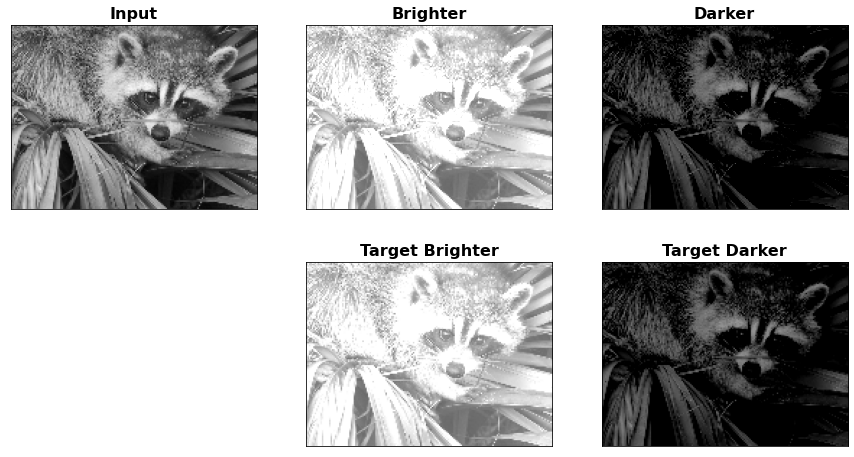

In [14]:
print()
bright_face_p100 = adjust_brightness(gray_face, 100)
bright_face_m100 = adjust_brightness(gray_face, -100)

plt.subplot(231)
plt.imshow(gray_face,cmap="gray",vmin=0,vmax=255)
just_title('Input');

plt.subplot(232)
plt.imshow(bright_face_p100,cmap="gray",vmin=0,vmax=255)
just_title('Brighter');

plt.subplot(233)
plt.imshow(bright_face_m100,cmap="gray",vmin=0,vmax=255)
just_title('Darker');


target_brighter = cv2.imread('targets/brighter.png')
target_darker   = cv2.imread('targets/darker.png')

plt.subplot(235)
plt.imshow(target_brighter,cmap="gray",vmin=0,vmax=255)
just_title('Target Brighter');

plt.subplot(236)
plt.imshow(target_darker,cmap="gray",vmin=0,vmax=255)
just_title('Target Darker');


<br>
<br>

### Problem 3 - Uniform Blurring

For this problem, you should take in  a  grayscale  image  and  return a  corresponding  image  that  has  been  uniformly blurred  (spatially  filtered)  using  3  x  3  uniform  averaging or "box" filter.

In [18]:
arr = np.array([[1, 2],
               [3, 4]])
print(np.average(arr))

2.5


In [61]:
def blur_uniform(image, kwidth, kheight):
    height, width = image.shape
    num_rows = height - kheight + 1
    num_cols = width - kwidth + 1
    
    result = np.zeros((num_rows, num_cols))
    
    for i in range(num_rows):
        for j in range(num_cols):
            row_high = i + kheight
            col_high = j + kwidth
            box = image[i:row_high, j:col_high]
            avg = np.average(box)
            # print((i, j))
            result[i, j] = avg
    
    return result

def blur_uniform3x3(image):
    return blur_uniform(image,3,3)

<br>

Now test your code... 

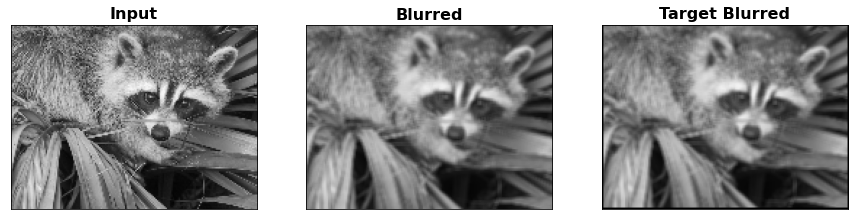

In [62]:
# print()

blur_face = blur_uniform3x3(gray_face)

plt.subplot(131)
plt.imshow(gray_face,cmap="gray",vmin=0,vmax=255)
just_title('Input');

plt.subplot(132)
plt.imshow(blur_face,cmap="gray",vmin=0,vmax=255)
just_title('Blurred')


target_blurred = cv2.imread('targets/ublur.png')
plt.subplot(133)
plt.imshow(target_blurred,cmap="gray",vmin=0,vmax=255)
just_title('Target Blurred')

<br>
<br>

### Problem 4 - Median Filter

This function should take a  grayscale  image and returns a corresponding image  that  has  been  median  filtered  using  a  3  x  3  neighborhood.  Each pixel from the original should be replaced by the median of the 9 values in a 3x3 neighborhood around that pixel.

In [74]:
def median_filter(image,kwidth,kheight):
    
    height, width = image.shape
    num_rows = height - kheight + 1
    num_cols = width - kwidth + 1
    
    result = np.zeros((num_rows, num_cols))
    
    for i in range(num_rows):
        for j in range(num_cols):
            row_high = i + kheight
            col_high = j + kwidth
            box = image[i:row_high, j:col_high]
            avg = np.median(box)
            # print((i, j))
            result[i, j] = avg
    
    return result

<br>

Now test your code... 

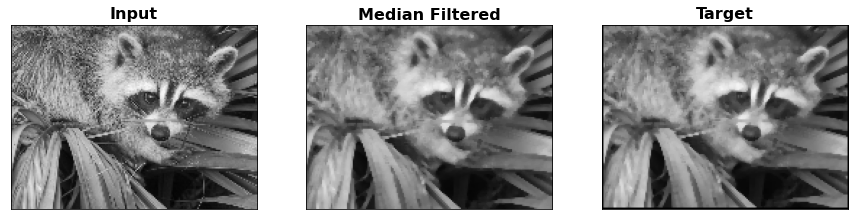

In [73]:
print()
med_face = median_filter(gray_face,3,3)

plt.subplot(131)
plt.imshow(gray_face,cmap="gray",vmin=0,vmax=255)
just_title('Input')

plt.subplot(132)
plt.imshow(med_face,cmap="gray",vmin=0,vmax=255)
just_title('Median Filtered')


median_target = cv2.imread('targets/median.png')
plt.subplot(133)
plt.imshow(median_target,cmap="gray",vmin=0,vmax=255)
just_title('Target')

Note the difference between this and the uniform blur above.  Especially look at the edges of the leaves, they're soft in the uniform blur, but sharp contrast here.  How come?

<br>
<br>

### Problem 5 - Sharpening

This function takes in  a  grayscale  image  and  returns a  corresponding  result  that  has  been  sharpened  using  an  unsharp  masking  kernel  that  has  a  5  in  the  middle  and  -1s  for  the  four-connected  neighbors.

In [44]:

a = np.arange(-12, 13) + 0.1
np.random.shuffle(a)
a = a.reshape((5,5))
print(a)
print(np.argmax(a))
print(np.argsort(a))
res = np.pad(a, (1, 1), 'constant', constant_values = 0)[1:-1, :]
print(res)

b = a.copy() 
b[b < 0] = 0
b[b > 0] = 1
print(b)

crossings_right = np.logical_xor(b, res[:, :-2])
print(crossings_right)
crossings_left = np.logical_xor(b,  res[:, 2:])
print(crossings_left)
crossings = np.logical_and(crossings_right, crossings_left)
print(crossings)

[[ -3.9  -5.9  -4.9   8.1   0.1]
 [ 11.1  -9.9   1.1  10.1   2.1]
 [ -6.9 -10.9   4.1   3.1   5.1]
 [  7.1 -11.9   6.1  -7.9   9.1]
 [ -1.9  -0.9  12.1  -2.9  -8.9]]
22
[[1 2 0 4 3]
 [1 2 4 3 0]
 [1 0 3 2 4]
 [1 3 2 0 4]
 [4 3 0 1 2]]
[[  0.   -3.9  -5.9  -4.9   8.1   0.1   0. ]
 [  0.   11.1  -9.9   1.1  10.1   2.1   0. ]
 [  0.   -6.9 -10.9   4.1   3.1   5.1   0. ]
 [  0.    7.1 -11.9   6.1  -7.9   9.1   0. ]
 [  0.   -1.9  -0.9  12.1  -2.9  -8.9   0. ]]
[[0. 0. 0. 1. 1.]
 [1. 0. 1. 1. 1.]
 [0. 0. 1. 1. 1.]
 [1. 0. 1. 0. 1.]
 [0. 0. 1. 0. 0.]]
[[False  True  True False False]
 [ True  True False False False]
 [False  True False False False]
 [ True  True False  True False]
 [False  True False  True  True]]
[[ True  True  True False  True]
 [False  True False False  True]
 [ True  True False False  True]
 [False  True False  True  True]
 [ True  True False  True False]]
[[False  True  True False False]
 [False  True False False False]
 [False  True False False False]
 [False  True Fal

In [97]:
def sharpen_image(image):
    padded_img = np.pad(image, (1, 1), 'constant', constant_values = 255)
    height, width = image.shape    
    result = np.zeros((height, width))
    
    for i in range(1, height + 1):
        for j in range(1, width + 1):
            nums = []
            
            left = j - 1
            right = j + 1
            up = i - 1
            down = i + 1
            
            nums.append(-padded_img[i, left])
            nums.append(-padded_img[i, right])
            nums.append(-padded_img[up, j])
            nums.append(-padded_img[down, j])
            nums.append(5 * padded_img[i, j])
            sum = np.sum(nums)
            result[i - 1, j - 1] = sum
    
    return result

<br>

Now test your code... 

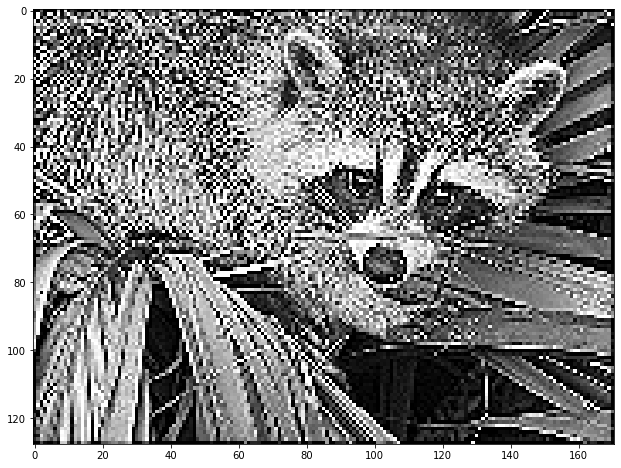

In [98]:
#target = cv2.imread('targets/gray.png')
#cv2.imwrite('targets/median.png',med_face)



sharp_face = sharpen_image(gray_face)
plt.imshow(sharp_face,cmap='gray',vmin=0,vmax=255)
plt.show()

<br>
<br>

### Problem 6 -  Edge Detection

Edge  detection:  takes in  a  grayscale  image  and  returns a  corresponding  result  that  shows  the  gradient  magnitude  of  the  input.    (You  may  afterward  scale  the  result  for  visibility  if  you  wish when  you  demonstrate  using  the  function.)

In [138]:
def x_grad(padded_img, i, j, left, right, up , down):
    nums = []
    
    nums.append(-padded_img[i, left])
    nums.append(-padded_img[up, left])
    nums.append(-padded_img[down, left])

    nums.append(padded_img[i, right])
    nums.append(padded_img[up, right])
    nums.append(padded_img[down, right])
    return np.average(nums)
    
def y_grad(padded_img, i, j, left, right, up , down):
    nums = []
    
    nums.append(-padded_img[up, left])
    nums.append(-padded_img[up, j])
    nums.append(-padded_img[up, right])

    nums.append(padded_img[down, left])
    nums.append(padded_img[down, j])
    nums.append(padded_img[down, right])
    return np.average(nums)

def edge_detect(image):
    padded_img = np.pad(image, (1, 1), 'constant', constant_values = 255)
    height, width = image.shape    
    result = np.zeros((height, width))
    
    for i in range(1, height + 1):
        for j in range(1, width + 1):
            
            left = j - 1
            right = j + 1
            up = i - 1
            down = i + 1
            
            x_gradient = x_grad(padded_img, i, j, left, right, up , down)
            y_gradient = x_grad(padded_img, i, j, left, right, up , down)
            
            mag = 3*x_gradient + 3*y_gradient
            result[i - 1, j - 1] = mag
    
    return result

<br>

Now test your code... 

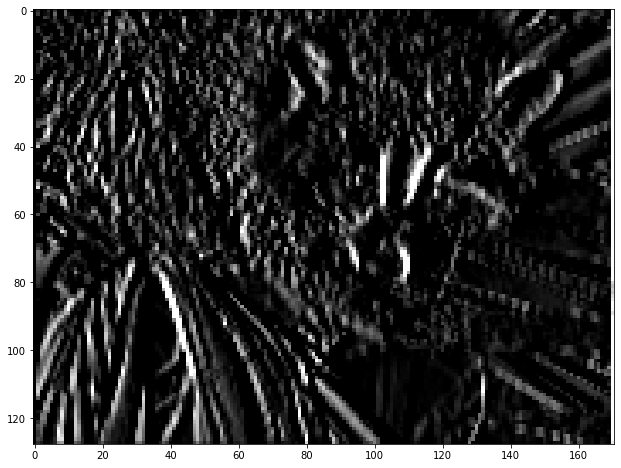

In [139]:
edge_face = edge_detect(gray_face)
plt.imshow(edge_face,cmap='gray',vmin=0,vmax=255)
plt.show()